In [38]:
import pandas as pd
import numpy as np


In [39]:
df = pd.read_csv("mergedData.csv")

In [40]:
df.describe()

,years
count,4385.00000
mean,2009.03626
std,32.88715
min,0.00000
25%,2011.00000
50%,2013.00000
75%,2016.00000
max,2019.00000


In [41]:
df.head()

,movieName,songName,songSinger,songMusic,songLyricist,songLyrics,years
0,Bala,Don’t Be Shy,"Badshah, Shalmali Kholgade, Gurdeep Mehendi",Sachin-Jigar,"Mellow D, Badshah","Sun, main hoon thoda sanki\r\nKarun mann ki\r\...",2019
1,Laal Kaptaan,Lahu Ka Rang Kara,Samira Koppikar,Samira Koppikar,Sahib,Morey.. lahu ka rang kara\r\nMorey lahu ka ran...,2019
2,Laal Kaptaan,Red Red Najariya,Shreya Ghoshal,Samira Koppikar,Saurabh Jain,"Badnaam shehar, badnaam gully\r\nIsme har raat...",2019
3,Laal Kaptaan,Kaal Kaal,"Brijesh Shandilya, Dino James",Samira Koppikar,Saurabh Jain,"Kaal kaal, kaal kaal, jo sapaat chal raha\r\nW...",2019
4,Laal Kaptaan,Taandav,"Kailash Kher, Brijesh Shandilya",Samira Koppikar,Puneet Sharma,Shor hai andher mein\r\nJo dher murda pedon ka...,2019


In [42]:
[x.lower() for x in list(df.songLyrics)[0].split("\n")]

['sun, main hoon thoda sanki\r',
 'karun mann ki\r',
 'baby gaana lagade thoda funky\r',
 'nahi mann ki\r',
 'nahi dhan ki\r',
 'ye baat hai tere tann ki\r',
 '\r',
 'paagal ho jaaun jab tu ho rubaru\r',
 'na lamba ocha gora chitta\r',
 'phir bhi dil mein tu\r',
 'ishq ne tere kiya hai bekaboo\r',
 'jaisa hai waisa hi pasand mujhko tu jaanu\r',
 '\r',
 'i just wanna feel your body\r',
 '(saanu kare ishaare)\r',
 'touch my body\r',
 "don't be shy my honey\r",
 '(saanu kare ishaare)\r',
 '\r',
 'i wanna feel your body\r',
 '(saanu kare ishaare)\r',
 'touch my body\r',
 "don't be shy my honey\r",
 '(saanu kare ishaare)\r',
 'touch my body\r',
 'fly my honey\r',
 "don't be shy my honey\r",
 'befikar fly my honey\r',
 "don't be shy my honey\r",
 '\r',
 'sun, main hoon thoda sanki\r',
 'karun mann ki\r',
 'baby gaana lagade thoda funky\r',
 'nahi mann ki\r',
 'nahi dhan ki\r',
 'ye baat hai tere tann ki...\r',
 '\r',
 'kuch bhi bole bina\r',
 'aankhon se tu baat kare\r',
 'ye shaitani jaan b

In [43]:
list(df.songLyrics)[1].split("\n")

['Morey.. lahu ka rang kara\r',
 'Morey lahu ka rang kara\r',
 'Morey.. lahu ka rang kara\r',
 'Morey lahu ka rang kara\r',
 '\r',
 'Kaare badarwa manwa mein ghoome\r',
 'Kaare bhujanga sapno mein jhoome\r',
 'Ghole.. zehar ki ye dhaara\r',
 'Morey lahu ka rang kara\r',
 'Morey.. lahu ka rang kara\r',
 'Lahu ka rang kaara...\r',
 '\r',
 'Katit kaadank kapat kalank\r',
 'Maathe mandha koi shraap hai jeevan\r',
 'Raja ho ya rank\r',
 'Kabila ya jhund\r',
 'Har praan ka hi lakshya hai maran\r',
 '\r',
 'Jeetna hai jo ye rann\r',
 'Kar bairi ka daman\r',
 'Warna mile na chhutkaara\r',
 '\r',
 'Morey.. lahu ka rang kara\r',
 'Morey lahu ka rang kara\r',
 'Morey.. lahu ka rang kara\r',
 'Morey lahu ka rang kaara...\r',
 'Lahu ka... kaara...\r',
 'Aa...']

In [44]:
'AbC fdalsfJSD'.lower()

'abc fdalsfjsd'

In [45]:
import re

line = 'upar se raat hoti ja rahi hai\'s naughty naughty naughty...'
line = "(saanu kare ishaare)"
# remove the "" and single alphabets in these
re.split(r'[;,\s...\n()\']\s*',line)

['', 'saanu', 'kare', 'ishaare', '']

In [46]:
import re

dataset = ''
countOfWords = 0
uniqueWords = {}
for song in list(df.songLyrics):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        dataset+=' '+word
        countOfWords+=1
        uniqueWords[word] = 1

    

In [48]:
# dataset[:1000]


In [49]:
countOfWords

870630

In [50]:
len(uniqueWords.keys())

40866

In [51]:
import os
import nltk
import gensim
from gensim import corpora, models, similarities

In [52]:
listDataset = list(dataset)

In [53]:
model = gensim.models.Word2Vec(dataset, min_count = 1, size = 32)


In [54]:
from gensim.test.utils import common_texts

In [55]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [56]:
import re

dataset_gensim = []
countOfWords = 0
uniqueWords = {}
for song in list(df.songLyrics):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    wordList = []
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        wordList.append(word)
        countOfWords+=1
        uniqueWords[word] = 1
    dataset_gensim.append(wordList)


In [57]:
model = gensim.models.Word2Vec(dataset_gensim, min_count = 1, size = 64)


In [58]:
model.most_similar("papa")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('batayenge', 0.9593122005462646),
 ('finger', 0.959017276763916),
 ('mehnat', 0.9558476209640503),
 ('inke', 0.953405499458313),
 ('doodh', 0.9530744552612305),
 ('chhuda', 0.952419638633728),
 ('chhoriya', 0.947034478187561),
 ('nikala', 0.9469686150550842),
 ('mausiqui', 0.9469031095504761),
 ('half', 0.9468361735343933)]

In [59]:
model2 = gensim.models.Word2Vec(dataset_gensim, size=100, window=50, min_count=1)


In [60]:
model2.most_similar("ladki")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('be-aarami', 0.6962901949882507),
 ('ladka', 0.6824854612350464),
 ('saawla', 0.6741031408309937),
 ('badnami', 0.6617950797080994),
 ('aqal', 0.6588687896728516),
 ('fantastic', 0.6565662026405334),
 ('uski', 0.6558965444564819),
 ('karti', 0.644262969493866),
 ('pagli', 0.6367144584655762),
 ('issak', 0.6287912726402283)]

In [63]:
model2.most_similar("papa")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('baap', 0.8540806770324707),
 ('bargaining', 0.7499722242355347),
 ('shehanshah', 0.7468669414520264),
 ('friday', 0.7461847066879272),
 ('bouncer', 0.7409294843673706),
 ('talli', 0.7385880351066589),
 ('maze', 0.7320384979248047),
 ('party', 0.7305536866188049),
 ('namaste”', 0.7304250001907349),
 ('hommies', 0.7287520170211792)]

In [64]:
model3 = gensim.models.FastText(size=4, window=10, min_count=1, sentences=dataset_gensim, iter=10)

In [65]:
model3.most_similar("daru")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sonar', 0.9995256066322327),
 ('undaa', 0.9993985891342163),
 ('shiqra', 0.999274492263794),
 ('makhtool', 0.9991981983184814),
 ('vash', 0.9989939332008362),
 ('woch', 0.9980777502059937),
 ('furtila', 0.9979347586631775),
 ('much', 0.9977303743362427),
 ('jeone', 0.9974491000175476),
 ('mercedes', 0.9973980188369751)]

In [66]:
# model4 = gensim.models.wrappers.Wordrank.train(dataset_gensim, corpus_file='text8', out_name='wr_model') 


## Interpretting style of the songs

In [67]:
try:
    import zopfli
except:
    !pip install zopfli
from zopfli.zlib import compress
from zlib import decompress
import sys
import os
import pandas as pd
import seaborn as sns
import numpy as np
import re


In [68]:
def getCompressionFromSong(song):
    compress_size = sys.getsizeof(compress(song))
    uncomressed_song_size = sys.getsizeof(song.encode())
    compression = (100-(compress_size/uncomressed_song_size)*100)
    return compression


In [78]:
compressions = []
songs = []

breaker = 0
for song in list(df.songLyrics):
    breaker+=1
    if breaker == 4000:
        break
        
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    processedSong = ''
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    
    compressions.append(getCompressionFromSong(processedSong))
#     songs.append(song)
    

In [79]:
songs = list(df.songName)[:4000]
# compressions = compressions

# sns.barplot(songs, np.array(compressions))

In [80]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
len(compressions)

3999

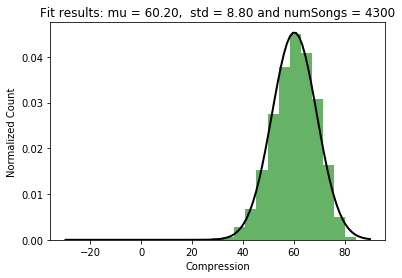

In [86]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
# data = norm.rvs(100.0, 25, size=500)
data= compressions

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("Compression")
plt.ylabel("Normalized Count")
title = "Fit results: mu = %.2f,  std = %.2f and numSongs = %0.0f" % (mu, std, len(compressions) + 301)
plt.title(title)
plt.show()

>Above represents chart showing distribution of compressions on 4300 songs in the dataset

## Analysing Compresion in 100 songs

In [84]:
# def songPreprocessing(song):
#     listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
#     processedSong = ''
#     for word in listOfWords:
#         word = word.lower()
#         if word == 'x2':
#             continue
#         if word == 'x4':
#             continue
#         processedSong+=' '+word
#     return processedSong
    
# compressions = []
# songs = []
# breakAt = 5000
# breaker = 0
# for song in list(df.songLyrics):
#     if breaker == breakAt:
#         break
#     breaker+=1
#     listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
#     processedSong = ''
#     for word in listOfWords:
# #         if word ==  '' || word=='(' || word==')' || word =='\'':
# #             pass
# #         else:
#         word = word.lower()
#         if word == 'x2':
#             continue
#         if word == 'x4':
#             continue
#         processedSong+=word
    
#     compressions.append(getCompressionFromSong(processedSong))
# #     songs.append(song)
# songs = list(df.songName)[:breakAt]
# print("Average Compression is : ", sum(compressions)/len(compressions))
# # compressions = compressions



In [87]:
# sns.lineplot(songs, np.array(compressions))

# Calculating the year wise compressions

In [89]:
df2 = pd.read_csv("mergedData.csv")

In [90]:
averageCompressionYearWiseData = []
compressionList = []
styleAnalysis = []

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    return processedSong

for x in df2.years.unique():
    # get all songs with year == x
    yearLyrics = list(df2[df2.years == x].songLyrics)
    sumCompressions = int(0)
    countSongsInYear = len(yearLyrics)
    songIndex = 0 
    songNames = list(df2[df2.years == x].songName)
    for lyrics in yearLyrics:
        lyrics = songPreprocessing(lyrics)
        compression = getCompressionFromSong(lyrics)
        sumCompressions+=compression
#         print("Compression for songName ",songNames[songIndex], " is : ")
#         print(compression)
        compressionList.append([x,songNames[songIndex], compression])
        songIndex+=1
    
    averageCompression = sumCompressions/countSongsInYear
#     print("-------- Average compression for year ", x, " is : ", averageCompression)
#     print("")
#     print("")
#     print("")
#     print("")
    averageCompressionYearWiseData .append([int(x),averageCompression])

Compression for songName  Don’t Be Shy  is : 
67.49256689791873
Compression for songName  Lahu Ka Rang Kara  is : 
58.144329896907216
Compression for songName  Red Red Najariya  is : 
59.56284153005464
Compression for songName  Kaal Kaal  is : 
66.69557675628795
Compression for songName  Taandav  is : 
68.63849765258216
Compression for songName  Crazy Lagdi  is : 
70.93821510297482
Compression for songName  Outfit  is : 
68.75739644970415
Compression for songName  Twinkle Twinkle  is : 
69.54595791805095
Compression for songName  Chand Nikla  is : 
60.48053024026512
Compression for songName  Vibe Hai  is : 
67.74519716885743
Compression for songName  Gandhi Money  is : 
66.19789050728278
Compression for songName  Remand  is : 
55.18062723302898
Compression for songName  Chal Bombay  is : 
67.7320221266134
Compression for songName  Kohinoor  is : 
50.811047786058744
Compression for songName  Ishq Maine Paaya  is : 
61.35338345864662
Compression for songName  Tanha Mera Pyaar  is : 
52.1

Compression for songName  Question Mark  is : 
52.783109404990405
Compression for songName  Basanti No Dance  is : 
58.18181818181819
Compression for songName  Paisa  is : 
59.45355191256831
Compression for songName  Jugraafiya  is : 
56.94564279551337
Compression for songName  Maila Maila  is : 
57.97872340425532
Compression for songName  Angrezi Luv Shuv  is : 
47.72277227722772
Compression for songName  Madaari  is : 
57.98941798941799
Compression for songName  Intezari  is : 
62.61363636363637
Compression for songName  Naina Yeh  is : 
59.60061443932412
Compression for songName  Shuru Karein Kya  is : 
56.33047210300429
Compression for songName  Baarish  is : 
54.82142857142857
Compression for songName  Gehra Halka  is : 
69.40581542351454
Compression for songName  Hashar Se Pehle  is : 
66.71122994652407
Compression for songName  Manmohini  is : 
58.05805805805806
Compression for songName  Hume Tumse Pyaar Kitna (Title Song)  is : 
55.85023400936037
Compression for songName  Humne

Compression for songName  Finito  is : 
56.161395856052344
Compression for songName  Jab Se Mera Dil  is : 
46.0559796437659
Compression for songName  Kokh Ke Rath Mein  is : 
40.96045197740112
Compression for songName  Gali Gali  is : 
46.080760095011875
Compression for songName  Salaam Rocky Bhai (Hindi)  is : 
56.763925729442974
Compression for songName  Bandeya Rey Bandeya  is : 
49.72776769509982
Compression for songName  Mera Wala Dance  is : 
54.255319148936174
Compression for songName  Aala Re Aala  is : 
60.19230769230769
Compression for songName  Tere Bin  is : 
58.01033591731266
Compression for songName  Aankh Marey  is : 
65.08795669824087
Compression for songName  Tu Hi Re  is : 
67.36493936052922
Compression for songName  Tanha Hua  is : 
48.64253393665159
Compression for songName  Ann Bann  is : 
57.61904761904762
Compression for songName  Heer Badnaam  is : 
40.59701492537313
Compression for songName  Husn Parcham  is : 
54.93300852618758
Compression for songName  Issaq

Compression for songName  Tera Fitoor  is : 
55.452127659574465
Compression for songName  Badan Pe Sitare  is : 
53.391684901531725
Compression for songName  Fu Bai Fu  is : 
51.84049079754601
Compression for songName  Tere Jaisa Tu Hai  is : 
59.89583333333333
Compression for songName  Achche Din  is : 
58.48056537102473
Compression for songName  Halka Halka  is : 
67.2153635116598
Compression for songName  Mohabbat  is : 
45.27777777777777
Compression for songName  Chota Sa Fasana  is : 
41.90981432360743
Compression for songName  Ghar Layenge Gold  is : 
68.69109947643979
Compression for songName  Chad Gayi Hai  is : 
61.64574616457462
Compression for songName  Naino Ne Baandhi  is : 
52.39043824701195
Compression for songName  Party Tera Bhai Dega  is : 
52.39766081871345
Compression for songName  One Sidedd  is : 
52.71828665568369
Compression for songName  Tere Jaisa  is : 
54.16666666666667
Compression for songName  Tajdar e Haram  is : 
54.88721804511278
Compression for songNam

Compression for songName  Kache Pakke Supne  is : 
65.26429341963322
Compression for songName  Na Kasoor  is : 
45.26854219948849
Compression for songName  Talli Tonight  is : 
42.391304347826086
Compression for songName  Hatt Ja Tau  is : 
55.894308943089435
Compression for songName  Mind Blowing  is : 
58.82352941176471
Compression for songName  Shehzada  is : 
63.94948335246843
Compression for songName  So Simple  is : 
53.51851851851852
Compression for songName  Pehla Nasha Once Again  is : 
52.86624203821656
Compression for songName  Na Tum Rahe Tum  is : 
42.88747346072187
Compression for songName  Naam Hai Mera  is : 
54.25219941348974
Compression for songName  Badnaamiyan  is : 
65.20376175548589
Compression for songName  Mohabbat Nasha Hai  is : 
47.52066115702479
Compression for songName  Tum Mere Ho  is : 
49.68017057569296
Compression for songName  Boond Boond  is : 
52.030947775628626
Compression for songName  Aashiq Banaya Aapne  is : 
47.63513513513513
Compression for so

Compression for songName  Yaara  is : 
56.60377358490566
Compression for songName  Vadde Velly  is : 
51.37614678899082
Compression for songName  Kankad  is : 
55.02471169686985
Compression for songName  Laddoo  is : 
55.02577319587629
Compression for songName  Kanha Unplugged  is : 
55.869565217391305
Compression for songName  Kanha  is : 
47.93187347931873
Compression for songName  Rocket Saiyyan  is : 
59.5482546201232
Compression for songName  Teen Kabootar  is : 
61.143410852713174
Compression for songName  Rangdaari  is : 
59.46843853820598
Compression for songName  Meer-E-Kaarwan  is : 
59.55056179775281
Compression for songName  Kaavaan Kaavaan  is : 
57.05967976710335
Compression for songName  Barfani  is : 
56.847133757961785
Compression for songName  Badass Babuaa  is : 
61.52597402597403
Compression for songName  Nazm Nazm (Feat. Ayushmann Khurrana)  is : 
54.123711340206185
Compression for songName  Bairaagi  is : 
55.985915492957744
Compression for songName  Twist Kamariy

Compression for songName  Jaanu  is : 
55.330490405117274
Compression for songName  Tera Hoke Rahoon  is : 
52.36051502145923
Compression for songName  Sachin Sachin  is : 
47.44027303754266
Compression for songName  Hind Mere Jind  is : 
62.2568093385214
Compression for songName  Darasal  is : 
46.17834394904459
Compression for songName  Main Tera Boyfriend  is : 
66.87158469945355
Compression for songName  Lambiyaan Si Judaiyaan  is : 
52.02205882352941
Compression for songName  Sadda Move  is : 
61.71232876712329
Compression for songName  Raabta (Title Song)  is : 
57.44047619047619
Compression for songName  Ik Vaari Aa  is : 
46.26168224299065
Compression for songName  Gedha  is : 
46.864686468646866
Compression for songName  Sargi  is : 
53.94088669950739
Compression for songName  Crack Jatt  is : 
53.304597701149426
Compression for songName  Ek Jindari  is : 
49.23076923076923
Compression for songName  Oh ho ho ho  is : 
50.879765395894424
Compression for songName  Hoor  is : 
39

Compression for songName  Bloody Hell  is : 
60.7185628742515
Compression for songName  Kidre Jaawan  is : 
41.194029850746276
Compression for songName  Jolly Good Fellow  is : 
60.56149732620321
Compression for songName  O Re Rangreza (Qawaali)  is : 
54.13642960812772
Compression for songName  Bawara Mann  is : 
43.76470588235294
Compression for songName  Go Pagal  is : 
53.674121405750796
Compression for songName  Aadat  is : 
46.16788321167883
Compression for songName  Ni Mainu  is : 
46.42857142857143
Compression for songName  Halka Halka  is : 
64.20824295010846
Compression for songName  Ghammar Ghammar  is : 
60.92592592592593
Compression for songName  Saanson Ke  is : 
50.10752688172043
Compression for songName  Enu Naam Che Raees  is : 
54.05904059040591
Compression for songName  Dhingana  is : 
50.44052863436123
Compression for songName  Udi Udi Jaye  is : 
55.04322766570605
Compression for songName  Zaalima  is : 
51.54798761609907
Compression for songName  Laila Main Laila 

Compression for songName  Nashe Si Chadh Gayi  is : 
62.02321724709785
Compression for songName  Ude Dil Befikre  is : 
54.63347164591978
Compression for songName  Labon Ka Karobaar  is : 
68.38235294117646
Compression for songName  Chal Meri Jaan  is : 
54.679802955665025
Compression for songName  Naamkarann (Title Track)  is : 
67.22350230414747
Compression for songName  Aa Leke Chalun Tujhko (Lori Song)  is : 
67.66220391349125
Compression for songName  Aaj Jaane Ki Zid Na Karo  is : 
63.492063492063494
Compression for songName  Fiza Ye Khiza  is : 
48.12499999999999
Compression for songName  Raat Saturday Ki Hai  is : 
63.333333333333336
Compression for songName  Happy Happy  is : 
65.85365853658536
Compression for songName  Chalte Chalte  is : 
59.09980430528376
Compression for songName  Tutak Tutak Tutiya (Title Track)  is : 
60.51587301587302
Compression for songName  Rail Gaddi  is : 
63.521288837744535
Compression for songName  Jeet Ka Halla Anthem  is : 
64.89945155393053
Com

Compression for songName  Khara Khara  is : 
56.9204152249135
Compression for songName  Mile Ho Tum  is : 
57.03422053231939
Compression for songName  Paani Ka Raasta  is : 
52.74725274725275
Compression for songName  Qatl-E-Aam (Unplugged)  is : 
65.17857142857143
Compression for songName  Ishqa  is : 
62.74900398406375
Compression for songName  Jaaneman Aah  is : 
53.67647058823529
Compression for songName  Toh Dishoom  is : 
54.24281984334204
Compression for songName  Sau Tarah Ke  is : 
62.11180124223603
Compression for songName  Mere Peeche Hindustan  is : 
66.87598116169545
Compression for songName  Rang Reza (Male)  is : 
54.493307839388144
Compression for songName  Rang Reza (Female)  is : 
53.690036900369
Compression for songName  Pyaar De  is : 
58.17901234567901
Compression for songName  Mar Gaye  is : 
65.51126516464473
Compression for songName  Main Adhoora  is : 
44.505494505494504
Compression for songName  Hug Me  is : 
64.20824295010846
Compression for songName  Tere Bi

Compression for songName  Jabra Fan  is : 
64.21825813221406
Compression for songName  Kab Aaoge  is : 
54.88454706927176
Compression for songName  Titli  is : 
62.66447368421053
Compression for songName  Manwa Behrupiya  is : 
60.285714285714285
Compression for songName  Gaddi  is : 
55.28317836010144
Compression for songName  Woh Chori  is : 
64.07142857142858
Compression for songName  Mundeya Di Maut  is : 
51.491819056785374
Compression for songName  Lonely  is : 
55.42521994134898
Compression for songName  Sare Karo Dab  is : 
53.10660562459123
Compression for songName  Jean Teri  is : 
56.163021868787276
Compression for songName  Tere Wargi Nai Ae  is : 
63.322884012539184
Compression for songName  Instagram Love  is : 
51.674107142857146
Compression for songName  Do Hazaar Solo  is : 
50.23310023310023
Compression for songName  Marjawan  is : 
63.609022556390975
Compression for songName  Yaar Di Gali  is : 
71.15613825983314
Compression for songName  Wakho Wakh  is : 
63.4191176

Compression for songName  Tumhe Apna Banane Ka  is : 
56.01851851851852
Compression for songName  Tera Thumka  is : 
61.55950752393981
Compression for songName  Mainu Ishq Lagaa  is : 
54.37201907790143
Compression for songName  Bihari Valentine  is : 
59.75794251134644
Compression for songName  Main To Yahin Hoon Lekin  is : 
44.57274826789839
Compression for songName  Jee Lo Yaaron  is : 
55.89080459770115
Compression for songName  Neeli Bullet  is : 
62.97376093294461
Compression for songName  Jab Tum Chaho  is : 
53.164556962025316
Compression for songName  Jalte Diye  is : 
55.38922155688623
Compression for songName  Prem Ratan Dhan Payo (Title Song)  is : 
63.93972012917115
Compression for songName  Aaj Unse Kehna Hai  is : 
53.31695331695332
Compression for songName  Murli Ki Taanon Si  is : 
16.21621621621621
Compression for songName  Bachpan Kahan  is : 
59.52848722986248
Compression for songName  Tod Tadaiyya  is : 
66.88654353562005
Compression for songName  Halo Re  is : 
6

Compression for songName  Chicken Kuk-Doo-Koo  is : 
64.44805194805195
Compression for songName  Aaj Ki Party  is : 
69.14893617021276
Compression for songName  Bhar Do Jholi Meri  is : 
59.97854077253219
Compression for songName  Tu Chahiye  is : 
52.40464344941957
Compression for songName  Selfie Le Le Re  is : 
62.631949331456724
Compression for songName  Sardaar Ji (Title Song)  is : 
43.943661971830984
Compression for songName  Hasi (Female)  is : 
42.45614035087719
Compression for songName  Ye Kaisi Jagah  is : 
52.4896265560166
Compression for songName  Hasi (Male Version)  is : 
56.38766519823788
Compression for songName  Humnava  is : 
48.10725552050473
Compression for songName  Hamari Adhuri Kahani  is : 
44.97153700189753
Compression for songName  Bezubaan Phir Se (Reprise)  is : 
47.24556489262371
Compression for songName  Vande Mataram  is : 
57.003891050583654
Compression for songName  Tattoo  is : 
63.65663322185061
Compression for songName  Naach Meri Jaan  is : 
57.389

Compression for songName  Issak Taari  is : 
55.01113585746103
Compression for songName  Judaa  is : 
74.23625254582485
Compression for songName  Jaago Mohan Pyaare  is : 
75.49488054607508
Compression for songName  Sau Aasoon  is : 
62.76703967446592
Compression for songName  Foreign Balamwa  is : 
79.06382978723404
Compression for songName  Meri Aadat Mera Hissa  is : 
48.63636363636363
Compression for songName  Choone Chali Aasman  is : 
61.360718870346595
Compression for songName  Dusokute  is : 
60.84812623274162
Compression for songName  Kya Karein  is : 
40.37037037037037
Compression for songName  Main Jo  is : 
57.330415754923415
Compression for songName  Khoney De  is : 
52.16138328530259
Compression for songName  Le Chal Mujhe  is : 
53.421052631578945
Compression for songName  Chhil Gaye Naina  is : 
62.77955271565495
Compression for songName  Piku Title Song  is : 
62.06896551724138
Compression for songName  Teri Meri Baatein  is : 
69.17885264341957
Compression for songNam

Compression for songName  Ishq Hai  is : 
67.62728146013448
Compression for songName  Mausam Yeh Kyun Badal Gaya  is : 
50.085470085470085
Compression for songName  Tanning  is : 
61.211129296235676
Compression for songName  Daftar Ki Girl  is : 
70.63227953410981
Compression for songName  Chal Mere Ghar  is : 
58.43971631205674
Compression for songName  Stardom  is : 
55.52505147563487
Compression for songName  One Thousand Miles  is : 
67.12987707108499
Compression for songName  I’m Your DJ Tonight  is : 
53.85826771653544
Compression for songName  Love Dose  is : 
55.45927209705373
Compression for songName  Desi Kalakaar  is : 
63.67292225201072
Compression for songName  Bang Bang (Title Track)  is : 
69.49300699300699
Compression for songName  Uff  is : 
64.4488579940417
Compression for songName  Meherbaan  is : 
57.04567541302235
Compression for songName  Tu Meri  is : 
63.071512309495894
Compression for songName  Maula Mere  is : 
64.75409836065575
Compression for songName  Dal M

Compression for songName  Blame The Night  is : 
56.94117647058823
Compression for songName  Shaayraana  is : 
67.49226006191951
Compression for songName  Tu Hi Toh Hai  is : 
58.29959514170041
Compression for songName  Sheeshe Ka Samundar  is : 
61.28133704735376
Compression for songName  Surroor  is : 
61.733333333333334
Compression for songName  Catch Me If You Can  is : 
69.8076923076923
Compression for songName  Hai Apna Dil  is : 
58.85416666666667
Compression for songName  Dard Dilo Ke  is : 
61.59317211948791
Compression for songName  Ice Cream  is : 
64.88925348646431
Compression for songName  Thaayein Kare Katta  is : 
65.30789245446661
Compression for songName  Revolver Rani (Title Song)  is : 
54.31893687707641
Compression for songName  Jind Meriye  is : 
60.76487252124646
Compression for songName  Dil Aaj Kal  is : 
61.693548387096776
Compression for songName  Yaari Yaari  is : 
55.37084398976982
Compression for songName  Sawaalon Mein  is : 
70.25316455696202
Compression 

Compression for songName  Dasni Sharab  is : 
71.43701951507984
Compression for songName  Rimco  is : 
65.17036235803137
Compression for songName  Sheeshe Ka Dil  is : 
68.55955678670361
Compression for songName  Naach Madhubala  is : 
66.35730858468678
Compression for songName  Mauj Ki Malharein  is : 
58.43071786310517
Compression for songName  Rangi Saari Gulabi  is : 
76.32
Compression for songName  Teri Jai Ho  is : 
61.13207547169811
Compression for songName  Rang Se Hui Rangeeli  is : 
60.78947368421053
Compression for songName  Aankhiyaan  is : 
54.906054279749476
Compression for songName  Sharm Laaj  is : 
54.90848585690516
Compression for songName  Gulabi Gang  is : 
67.00729927007299
Compression for songName  Dheemi Dheemi  is : 
60.86564472497746
Compression for songName  Gunday Title Song  is : 
47.61194029850746
Compression for songName  Mann Kunto Maula  is : 
62.84584980237154
Compression for songName  Saaiyaan  is : 
64.1291810841984
Compression for songName  Jiya  is 

Compression for songName  Kahaan Hoon Main  is : 
57.04347826086957
Compression for songName  Maahi Ve  is : 
55.57184750733138
Compression for songName  Patakha Guddi  is : 
61.27622377622377
Compression for songName  Heera  is : 
59.4847775175644
Compression for songName  Wanna Mash Up  is : 
57.44466800804829
Compression for songName  Punjabi Wedding Song  is : 
62.36044657097289
Compression for songName  Zehnaseeb  is : 
60.49382716049383
Compression for songName  Ishq Bulaava  is : 
63.946587537091986
Compression for songName  Manchala  is : 
53.051643192488264
Compression for songName  Shake It Like Shammi  is : 
62.22741433021807
Compression for songName  Drama Queen  is : 
60.33591731266149
Compression for songName  Jai Ho (Title Song)  is : 
46.649484536082475
Compression for songName  Naacho Re  is : 
64.57023060796647
Compression for songName  Tumko Toh Aana Hi Tha  is : 
48.51936218678815
Compression for songName  Photocopy  is : 
66.3978494623656
Compression for songName  

Compression for songName  Alvida  is : 
57.730496453900706
Compression for songName  Bismillah  is : 
58.70253164556962
Compression for songName  Chugliyaan  is : 
60.98707403055229
Compression for songName  Tu Hi Khwahish  is : 
54.826254826254825
Compression for songName  Tayyab Ali  is : 
59.61732124874119
Compression for songName  Ye Tune Kya Kiya  is : 
55.39033457249071
Compression for songName  Lungi Dance  is : 
58.24175824175824
Compression for songName  Ready Steady Po  is : 
59.124629080118694
Compression for songName  Kashmir Main Tu Kanyakumari  is : 
64.29699842022117
Compression for songName  Tera Rastaa Chhodoon Na  is : 
52.50431778929188
Compression for songName  Titli  is : 
65.6
Compression for songName  One Two Three Four Get On The Dance Floor  is : 
57.127882599580715
Compression for songName  Chennai Express (Title Song)  is : 
48.580786026200876
Compression for songName  O Rangrez  is : 
67.77546777546777
Compression for songName  Bhaag Milkha Bhaag (Title Trac

Compression for songName  Shubhaarambh  is : 
61.455847255369925
Compression for songName  Meethi Boliyan  is : 
61.65311653116532
Compression for songName  Manja  is : 
58.65209471766849
Compression for songName  Maria Pitache  is : 
51.851851851851855
Compression for songName  Dharpakad  is : 
47.16981132075472
Compression for songName  Kaun Mera  is : 
67.61421319796955
Compression for songName  Gore Mukhde Pe  is : 
61.94174757281554
Compression for songName  Mujh Mein Tu  is : 
60.49586776859504
Compression for songName  Tujh Sang Lagi  is : 
57.166666666666664
Compression for songName  Sadda Dil Vi Tu (Ga Ga Ga Ganpati)  is : 
63.14176245210728
Compression for songName  Man Basiyo Saanwariyo  is : 
53.72549019607843
Compression for songName  Chandu Ki Girl Friend  is : 
53.0562347188264
Compression for songName  Shambhu Sutaya  is : 
62.71062271062271
Compression for songName  Duhaai  is : 
57.6530612244898
Compression for songName  Sorry Sorry  is : 
61.16959064327485
Compressio

Compression for songName  Punjabiyan Di Battery  is : 
70.90779127948535
Compression for songName  Tera Nasha  is : 
38.51851851851852
Compression for songName  So Gaya Yeh Jahan  is : 
75.1660026560425
Compression for songName  Sapna Mera Toota  is : 
73.78190255220417
Compression for songName  Dramebaaz  is : 
67.48815165876778
Compression for songName  Dil Ki Toh Lag Gai  is : 
66.31853785900783
Compression for songName  Mera Mann Kehne Laga  is : 
57.33333333333333
Compression for songName  Dhak Dhak  is : 
63.00268096514745
Compression for songName  Sadi Gali Aaja  is : 
72.61538461538461
Compression for songName  Tu Hi Tu  is : 
65.18282988871223
Compression for songName  Bismillah  is : 
59.5903165735568
Compression for songName  Chugliyaan  is : 
67.12922810060712
Compression for songName  Tu Hi Khwahish  is : 
61.391541609822646
Compression for songName  Tayyab Ali  is : 
63.95348837209303
Compression for songName  Ye Tune Kya Kiya  is : 
58.02098950524738
Compression for song

Compression for songName  Aga Bai  is : 
64.47916666666666
Compression for songName  What To Do  is : 
55.169082125603865
Compression for songName  Sava Dollar (Lavni)  is : 
59.04139433551198
Compression for songName  Dreamum Wakeupum  is : 
48.05194805194806
Compression for songName  Ishq Shava  is : 
68.28528072837634
Compression for songName  Jab Tak Hai Jaan (Title Track)  is : 
57.05263157894736
Compression for songName  Jiya Re  is : 
55.854643337819645
Compression for songName  Heer  is : 
69.89079563182528
Compression for songName  Saans  is : 
53.99568034557235
Compression for songName  Challa (English Translation)  is : 
59.66081162931557
Compression for songName  Challa  is : 
66.01842374616172
Compression for songName  Jab Tak Hai Jaan - The Poem  is : 
51.226692836113834
Compression for songName  Kunda Khol  is : 
46.264367816091955
Compression for songName  Mehangai  is : 
66.26262626262627
Compression for songName  Boom Boom (Lip Lock)  is : 
63.221601489757916
Compress

Compression for songName  Dan Dan Cheeni  is : 
70.02224694104561
Compression for songName  Pyar ka dard hai  is : 
45.23227383863081
Compression for songName  Umeed  is : 
59.84848484848485
Compression for songName  Ishq Mein Ruswaa  is : 
62.97640653357532
Compression for songName  Lagan Lagi More Piya  is : 
70.82494969818913
Compression for songName  Naina Re  is : 
68.65520728008089
Compression for songName  Tu Hi Rab  is : 
61.757719714964374
Compression for songName  Gat Gat  is : 
74.17582417582418
Compression for songName  Ik Mulaqaat  is : 
61.65191740412979
Compression for songName  Dhagala Lagali  is : 
60.272417707150964
Compression for songName  Dil Ka Telephone  is : 
71.96684250188395
Compression for songName  Radhe Radhe  is : 
61.96013289036545
Compression for songName  Ab Teri Baari  is : 
60.02430133657351
Compression for songName  Intezari  is : 
62.61363636363637
Compression for songName  Naina Yeh  is : 
59.60061443932412
Compression for songName  Shuru Karein Ky

Compression for songName  Kala Suit  is : 
63.83495145631068
Compression for songName  Saza  is : 
58.70445344129555
Compression for songName  Nede Nede  is : 
57.46606334841629
Compression for songName  Jattaan De Dimag Ghum Gye  is : 
60.92572658772874
Compression for songName  Dil Diya Gallan  is : 
57.01624815361891
Compression for songName  Sharbati Akhiyan  is : 
64.7834274952919
Compression for songName  Kuch To Hua Hai  is : 
51.492537313432834
Compression for songName  Addi Maar  is : 
60.02290950744559
Compression for songName  Behka Na  is : 
65.59691912708601
Compression for songName  Haaye Dil  is : 
57.43519781718963
Compression for songName  Guddi Da Parahuna  is : 
60.61538461538461
Compression for songName  Kartootein  is : 
56.9672131147541
Compression for songName  Akela  is : 
61.67247386759582
Compression for songName  Khamoshi  is : 
56.23678646934461
Compression for songName  Darshan Mehnge  is : 
59.50196592398427
Compression for songName  Meri Aakad  is : 
70.8

Compression for songName  Ishq Shava  is : 
70.06651884700665
Compression for songName  Saans  is : 
65.09433962264151
Compression for songName  Moksha  is : 
67.32673267326732
Compression for songName  Palang Tod Hai Teri Jawani  is : 
69.25698704839809
Compression for songName  Ankhiya Mila Ke Channa  is : 
68.5929648241206
Compression for songName  Tees Uthee Dil Mein  is : 
64.91228070175438
Compression for songName  Kahiya Se Jogali Gullackwa  is : 
70.98540145985402
Compression for songName  Meri Kahani  is : 
57.96897038081805
Compression for songName  Desi Mem  is : 
70.88091353996737
Compression for songName  Ishq Ki Dafli Baje  is : 
61.58068057080131
Compression for songName  Luni Hasi  is : 
56.06758832565284
Compression for songName  Luv Shuv Tey Chicken Khurana Title Song  is : 
57.86407766990291
Compression for songName  Motorwada  is : 
64.73941368078175
Compression for songName  Kikli Kalerdi  is : 
48.557692307692314
Compression for songName  Arey Arey Arey  is : 
62.

Compression for songName  Dheaon Dheaon Song  is : 
59.53565505804312
Compression for songName  Har Saans Mein Song  is : 
75.0806972240155
Compression for songName  Baatein Shuru  is : 
57.29303547963207
Compression for songName  Dhinchak Zindagi Song  is : 
48.66468842729971
Compression for songName  Afreen Song  is : 
36.8020304568528
Compression for songName  Bismillah  is : 
54.063604240282686
Compression for songName  Khuda Ke Liye  is : 
62.9242819843342
Compression for songName  Karmaari Duniya  is : 
54.77477477477478
Compression for songName  Chalo Na Khwahishon Ke Peeche  is : 
33.18181818181817
Compression for songName  Pavitra Rishta Title Song  is : 
41.810344827586206
Compression for songName  Tik Tuk  is : 
67.45796241345204
Compression for songName  Parda Nasheen  is : 
67.39583333333334
Compression for songName  Shake It Saiyyan  is : 
61.70970614425645
Compression for songName  Hey Rascals  is : 
51.73237753882915
Compression for songName  Love Love Love  is : 
69.00

Compression for songName  Roshanee (Roshni) Song  is : 
67.85714285714286
Compression for songName  Saans Albeli (Kaun Si Dor) Song  is : 
63.58024691358025
Compression for songName  Mauka  is : 
63.477366255144034
Compression for songName  Acha Lagta Hai  is : 
53.3596837944664
Compression for songName  Miracle Worker Song  is : 
55.26090675791275
Compression for songName  SuperHeavy – Satyameva Jayate  is : 
48.09741248097412
Compression for songName  Maula Maula  is : 
64.49468085106383
Compression for songName  Saathiya  is : 
56.88405797101449
Compression for songName  Singham Title Song  is : 
43.426294820717125
Compression for songName  Chatte Batte  is : 
51.51057401812689
Compression for songName  Tai Tai Phiss  is : 
72.74800456100343
Compression for songName  Ek Ladki Shabnami Jaisi  is : 
46.978557504873294
Compression for songName  Yeh Jazba Hamara Aazadi Ka  is : 
59.11047345767575
Compression for songName  Har Ore Tabahi Ka Manzar  is : 
64.31623931623932
Compression for

Compression for songName  Laila O Laila  is : 
73.46456692913385
Compression for songName  Chalo Dilli Title Song  is : 
64.8471615720524
Compression for songName  Geet Kab Sarhadein Mante Hain  is : 
58.521560574948666
Compression for songName  Saari Hairat Hai Meri  is : 
63.06818181818182
Compression for songName  Teri Justuju (Saanware)  is : 
62.88515406162465
Compression for songName  Karma is a Bitch  is : 
66.2676822633297
Compression for songName  Saibo  is : 
60.07194244604317
Compression for songName  Raahein Dhuaan Dhuaan  is : 
45.7345971563981
Compression for songName  Rangeen  is : 
72.59414225941423
Compression for songName  Huqa Pani Band Ho Gaya  is : 
42.903225806451616
Compression for songName  Channo  is : 
58.80077369439072
Compression for songName  Chal Dil Merey  is : 
69.93769470404985
Compression for songName  Heartbeat (Indian Remix)  is : 
62.95005807200929
Compression for songName  Phir Suna  is : 
48.62579281183932
Compression for songName  Tune Mere Jana 

Compression for songName  Motumaster  is : 
61.36957658128594
Compression for songName  Kahani Khatam Hai Ya  is : 
37.98701298701299
Compression for songName  Geet Mein Dhalte Lafzon Mein  is : 
66.17480136208854
Compression for songName  Aazaadiyan  is : 
56.12082670906201
Compression for songName  Naav Hai Teri  is : 
60.19629225736096
Compression for songName  Alvida  is : 
55.34591194968554
Compression for songName  Meri Maa  is : 
60.66350710900474
Compression for songName  Muskura  is : 
56.50224215246637
Compression for songName  Phone Milawaan  is : 
51.45797598627787
Compression for songName  Munda Dil Da Ni Rich Milna  is : 
53.333333333333336
Compression for songName  20 Saal  is : 
61.41947224749772
Compression for songName  Radar  is : 
46.57534246575342
Compression for songName  Diary  is : 
70.0381679389313
Compression for songName  Koi Farak Nahi  is : 
47.544080604534
Compression for songName  Sochta Hoon Main  is : 
71.92307692307692
Compression for songName  Chalki 

Compression for songName  Tumhare Bagair Jeena Kya  is : 
49.02654867256637
Compression for songName  Kehna Hai Tumse Kehna  is : 
67.7124183006536
Compression for songName  Tinak Tin Tana Woh Dhun Bajana  is : 
62.90832455216017
Compression for songName  Tere Pyaar Ne Ye Kya Kar Diya  is : 
67.5654242664552
Compression for songName  Resham Wale Kurte Pe Laal Dupatta Daali Hai  is : 
69.54773869346734
Compression for songName  Sasuji Tharo Lalla  is : 
72.45392822502424
Compression for songName  Sunday Ki Raat Thi  is : 
68.11451135241856
Compression for songName  Raja Chalo Akele Mein  is : 
76.08069164265129
Compression for songName  Mujhe Raat Din Bas Mujhe Chahti Ho  is : 
58.9572192513369
Compression for songName  Zindagi Maut Na Ban Jaye  is : 
73.50199733688416
Compression for songName  Kariye Na Koi Vaada Kisi Se Kariye Na  is : 
75.61643835616438
Compression for songName  Kahin Aag Lage Lag Jaave  is : 
69.22514619883042
Compression for songName  Taal Se Taal Mila  is : 
69.41

Compression for songName  Kahe Saiyan Teri Meri Baat Bane Nahi  is : 
71.5316760224539
Compression for songName  Dil Tera Kisne Toda  is : 
61.333333333333336
Compression for songName  Chahe Meri Jaan Tu Le Le  is : 
77.34311328443357
Compression for songName  Aaj Phir Tumpe Pyar Aaya Hai  is : 
63.53240152477764
Compression for songName  Papa Kehte Hain Bada Naam Karega  is : 
65.32156368221942
Compression for songName  Gazab Ka Hai Din  is : 
64.19753086419753
Compression for songName  Akele Hain To Kya Gam Hai  is : 
70.06451612903226
Compression for songName  Aye Mere Humsafar  is : 
70.81545064377683
Compression for songName  Husn Ki Wadiyon Mein  is : 
71.2623097582811
Compression for songName  Kabhi Kisi Ko Mukammal Jahan Nahi Milta  is : 
71.21621621621622
Compression for songName  Jeena Kya Aji Pyaar Bina  is : 
80.66465256797584
Compression for songName  Tu Kitne Baras Ki Tu Kitne Baras Ka  is : 
73.01451750640479
Compression for songName  Jab Chaye Mera Jadoo  is : 
63.00984

Compression for songName  Tum Salamat Raho Yeh Hai Meri Dua  is : 
68.22033898305085
Compression for songName  Tohfa Kabool Hai Hamein Sarkar Aapka  is : 
66.03618421052632
Compression for songName  Pyar Mein Dil Pe Maar De Goli  is : 
71.94719471947195
Compression for songName  Har Chori Rani Hiyaan  is : 
68.45609654598418
Compression for songName  Asli Kya Hai Nakli Kya Hai  is : 
73.52697095435684
Compression for songName  Aadhi Baat Ho Chuki  is : 
70.96100278551532
Compression for songName  Yeh Din To Aata Hai Ek Din Jawani Mein  is : 
67.93802145411203
Compression for songName  Jidhar Dekhoon Teri Tasveer  is : 
61.78217821782178
Compression for songName  Aye Zindagi Gale Laga Le  is : 
73.93548387096774
Compression for songName  Mere Dil Se Dillagi Na Kar  is : 
71.6376944190302
Compression for songName  Pyaar Kiya Nahi Jaata  is : 
73.17596566523605
Compression for songName  Anari Ka Khelna Khel Ka Satyanash  is : 
71.86732186732186
Compression for songName  Kangana Oye Hoye K

Compression for songName  Rang Bhare Baadal Se - Chandni O Meri Chandni  is : 
68.496079828938
Compression for songName  Lagi Aaj Sawan Ki Phir Woh Jhadi Hai  is : 
61.11111111111111
Compression for songName  Main Sasural Nahi Jaungi  is : 
68.22916666666667
Compression for songName  Aa Meri Jaan  is : 
75.08196721311475
Compression for songName  Tere Mere Hothon Pe  is : 
71.0412147505423
Compression for songName  Baabul Ka Yeh Ghar Gori  is : 
72.55192878338279
Compression for songName  Wada Kiya Hai - Naachenge Hum Disco Daandiyaa  is : 
52.20338983050847
Compression for songName  Aaya Mausam Dosti Ka  is : 
60.396039603960396
Compression for songName  Mere Rang Mein Rangne Wali  is : 
66.86390532544378
Compression for songName  Dil De Ke Darde Mohabbat Liya Hai  is : 
62.3469387755102
Compression for songName  Kabootar Ja Ja Ja  is : 
64.5621181262729
Compression for songName  Aate Jaate Hanste Gaate  is : 
50.54347826086957
Compression for songName  Aaja Shaam Hone Aayi  is : 
62.

Compression for songName  Aa Meri Life Bana De  is : 
70.71307300509338
Compression for songName  Na Tum Jaano Na Hum  is : 
64.75300400534044
Compression for songName  Chaand Sitaare Phool Aur Khushboo  is : 
71.05538140020899
Compression for songName  Saiyan Ne Jo Teri Pakadi Na Baiyan  is : 
75.28384279475982
Compression for songName  Mela Dilon Ka Aata Hai  is : 
56.90834473324213
Compression for songName  O Rabba Mujhe Pyaar Ho Gaya - Mili Jab Se Nazar  is : 
45.00846023688664
Compression for songName  Tu Yaar Tu Hi Dildar  is : 
68.44660194174757
Compression for songName  Tum Aaye To Hawaon Mein  is : 
65.78947368421052
Compression for songName  Panchhi Nadiya Pawan Ke Jhonke  is : 
72.08835341365462
Compression for songName  Dupatte Ka Pallu  is : 
78.85590152063722
Compression for songName  Meri Aankhon Ne Chuna Hai  is : 
71.29714811407544
Compression for songName  Haal Kaisa Hai Janaab Ka  is : 
76.90566037735849
Compression for songName  Paanch Rupaiya Baara Aana  is : 
68.3

Compression for songName  Isse Pehle Ke Yaad Tu Aaye  is : 
69.03460837887067
Compression for songName  Dil Mein Ho Tum Aankhon Mein Tum (Male)  is : 
69.08866995073892
Compression for songName  De Rahi Hai Duain Ye Behna Teri  is : 
71.95242814667988
Compression for songName  Dil Mein Ho Tum Aankhon Mein Tum  is : 
66.79438058748403
Compression for songName  Na Jaane Kya Hua  is : 
66.7001003009027
Compression for songName  Tere Mere Beech Mein  is : 
71.30681818181819
Compression for songName  Mere Jeevan Saathi Pyar Kiye Ja  is : 
63.2088520055325
Compression for songName  Hum Bane Tum Bane Ek Duje Ke Liye  is : 
72.83333333333333
Compression for songName  Mere Angne Mein Tumhara Kya Kaam Hai  is : 
79.106529209622
Compression for songName  Kab Ke Bichde Hue  is : 
66.30785791173304
Compression for songName  Kahe Paise Pe Itna Guroor Kare Hai  is : 
67.7006068779501
Compression for songName  Jiska Koi Nahi Uska To Khuda Hai Yaaro  is : 
72.00736648250461
Compression for songName  Ap

Compression for songName  Nazrein Kahan  is : 
69.63402571711177
Compression for songName  Rab Na Kare Ke Yeh Zindagi  is : 
72.10338680926915
Compression for songName  Vaada Raha  is : 
65.2439024390244
Compression for songName  Le Le Maza Le  is : 
78.22374039282664
Compression for songName  Tum Yaad Na Aaya Karo  is : 
71.36563876651982
Compression for songName  Mujhe Tum Yaad Karna Aur Mujhko Yaad Aanaa Tum  is : 
43.66925064599483
Compression for songName  Liye Sapne Nigaahon Mein - Zindagi Aa Raha Hoon Main  is : 
48.28897338403042
Compression for songName  Saanjh Dhale Gagan Tale Hum Kitne Ekaki  is : 
65.49079754601226
Compression for songName  Man Kyon Behka Re Behka Aadhi Raat Ko  is : 
77.10547833197056
Compression for songName  Deewana Dil Deewana  is : 
72.1556886227545
Compression for songName  Woh To Hai Albela  is : 
73.38403041825094
Compression for songName  Sachi Yeh Kahani Hai  is : 
69.60352422907489
Compression for songName  Aye Kash Ke Hum Hosh Mein  is : 
76.361

In [91]:
import numpy as np
yearly_compression = np.array(averageCompressionYearWiseData)

In [112]:
df2.years.unique()
yearly_compression
yearly_compression_filtered[:,0][:,0]
yearly_compression_filtered[:,0][:,1]

array([62.38807506, 57.34359336, 55.02835702, 56.62091177, 58.88323146,
       60.36783488, 61.13366854, 60.09554389, 59.21910803, 62.78645948,
       66.35138008, 65.79095698, 68.47706785, 68.83255771, 66.45580616,
       72.42524917, 68.1693464 , 70.87411814, 66.62405119, 67.20822478,
       64.98652768, 72.46470067, 67.52539881, 68.39825582, 67.35455143,
       61.09500596, 68.65597553, 66.3944576 , 70.80831418, 69.0499321 ,
       65.65827677, 66.31811623, 67.7672956 , 69.67521515, 65.98088773,
       66.65504003, 68.6699559 , 66.80557471, 64.73468144, 68.51560915,
       68.61186567, 67.53430162, 66.9685644 , 64.74634778, 71.86830404,
       66.58529673, 69.08351508, 66.71381801, 70.96770335, 69.90604449,
       69.57140783, 71.62706556, 66.2971955 , 69.04080321, 70.59270012,
       65.71347612, 71.69129316, 67.98032287, 69.63397723, 64.24708543,
       67.06218074, 68.68772716, 65.39284655, 64.62297346, 67.8645793 ,
       71.30126384, 61.18402773, 63.44338989, 69.64206676, 62.36

In [102]:
yearly_compression_filtered = []
for x in yearly_compression:
    if(x[0]!=0):
        yearly_compression_filtered.append([x])
yearly_compression_filtered = np.array(yearly_compression_filtered)

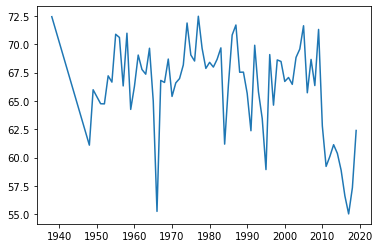

In [116]:
plt = sns.lineplot(yearly_compression_filtered[:,0][:,0], yearly_compression_filtered[:,0][:,1])


In [ ]:
len(df2.songLyricist.unique())

In [ ]:
df2.head(2)

# Calculating Artist Wise Compression


In [ ]:
averageCompressionLyricistWiseData = []
compressionList_Lyricist = []
styleAnalysis_Lyricist = []

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    return processedSong

for x in df2.songLyricist.unique():
    # get all songs with year == x
    lyricistSongsLyrics = list(df2[df2.songLyricist == x].songLyrics)
    sumCompressions = int(0)
    countSongsInYear = len(lyricistSongsLyrics)
    songIndex = 0 
    songNames = list(df2[df2.songLyricist == x].songName)
    for lyrics in lyricistSongsLyrics:
        lyrics = songPreprocessing(lyrics)
        compression = getCompressionFromSong(lyrics)
        sumCompressions+=compression
        print("Compression for songName ",songNames[songIndex], " is : ")
        print(compression)
        compressionList_Lyricist.append([x, songNames[songIndex], compression])
        songIndex+=1
    
    averageCompression = sumCompressions/countSongsInYear
    print("-------- Average compression for Lyricist ", x, " is : ", averageCompression)
    print("")
    print("")
    print("")
    print("")
    averageCompressionLyricistWiseData.append([x,averageCompression])

In [ ]:
# saving files now

yearWiseDF = pd.DataFrame()
# save Artist wise compressions

# save Year wise compressions


In [ ]:
sns.barplot(averageCompressionLyricistWiseData[:,0], averageCompressionLyricistWiseData[:,1])

In [ ]:
sns.distplot(np.array(averageCompressionLyricistWiseData)[:,0],np.array(averageCompressionLyricistWiseData)[:,1])

In [ ]:
np.array(averageCompressionLyricistWiseData)[:,1]

In [ ]:
allLyricists = []
lyricistsCompression = []
for x in averageCompressionLyricistWiseData:
    allLyricists.append(x[0])
    lyricistsCompression.append(x[1])
    
lyricistsAndCompressions = pd.DataFrame()
lyricistsAndCompressions["lyricist"] = allLyricists
lyricistsAndCompressions["compression"] = lyricistsCompression

In [ ]:
lyricistsAndCompressions.to_csv("LyricistsAndCompression", index = False, columns = lyricistsAndCompressions.columns)

In [ ]:
yearWiseCompressions = pd.DataFrame()

In [ ]:
songs_Compressions = pd.DataFrame()
mySong = []
mySongCompression = []
for row in compressionList_Lyricist:
    mySong.append(row[1])
    mySongCompression.append(row[2])
songs_Compressions["song"] =  mySong
songs_Compressions["compression"] = mySongCompression
songs_Compressions.to_csv("SongsAndCompressions", index = False, columns = songs_Compressions.columns)  

In [ ]:
pd.read_csv("SongsAndCompressions")
pd.read_csv("LyricistsAndCompression")

In [ ]:
yearWiseCompressionDataFrame =pd.DataFrame()
yearWiseCompressionDataFrame["year"] = yearly_compression[:10][:,0]
yearWiseCompressionDataFrame["compression"] = yearly_compression[:10][:,1]
yearWiseCompressionDataFrame.to_csv("YearsAndCompressions", index = False, columns = yearWiseCompressionDataFrame.columns)  


In [ ]:
pd.read_csv("YearsAndCompressions")

In [117]:
data = pd.read_csv("mergedData.csv")

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=' '+ word
    return processedSong

lyrics = list(data.songLyrics)
# once we have the songs, lets preprocess the song
preprocessedSongs = []
wordCountVector = []
for song in lyrics:
    processedSong = songPreprocessing(song)
    wordCount = 0
    for word in processedSong.split(" "):
        if(word!='' and word!= ' '):
            wordCount+=1
    wordCountVector.append(wordCount)
    preprocessedSongs.append(processedSong)

len(wordCountVector), len(preprocessedSongs), preprocessedSongs[1], wordCountVector[1]

(4385,
 4385,
 ' morey  lahu ka rang kara morey lahu ka rang kara morey  lahu ka rang kara morey lahu ka rang kara kaare badarwa manwa mein ghoome kaare bhujanga sapno mein jhoome ghole  zehar ki ye dhaara morey lahu ka rang kara morey  lahu ka rang kara lahu ka rang kaara   katit kaadank kapat kalank maathe mandha koi shraap hai jeevan raja ho ya rank kabila ya jhund har praan ka hi lakshya hai maran jeetna hai jo ye rann kar bairi ka daman warna mile na chhutkaara morey  lahu ka rang kara morey lahu ka rang kara morey  lahu ka rang kara morey lahu ka rang kaara   lahu ka   kaara   aa   ',
 110)

In [118]:
data["wordCount"] = wordCountVector
data["preprocessedSong"] = preprocessedSongs

In [119]:
data.to_excel("Songs_count_preprocessed.xlsx")


In [120]:
data

,movieName,songName,songSinger,songMusic,songLyricist,songLyrics,years,wordCount,preprocessedSong
0,Bala,Don’t Be Shy,"Badshah, Shalmali Kholgade, Gurdeep Mehendi",Sachin-Jigar,"Mellow D, Badshah","Sun, main hoon thoda sanki\r\nKarun mann ki\r\...",2019,259,sun main hoon thoda sanki karun mann ki baby ...
1,Laal Kaptaan,Lahu Ka Rang Kara,Samira Koppikar,Samira Koppikar,Sahib,Morey.. lahu ka rang kara\r\nMorey lahu ka ran...,2019,110,morey lahu ka rang kara morey lahu ka rang k...
2,Laal Kaptaan,Red Red Najariya,Shreya Ghoshal,Samira Koppikar,Saurabh Jain,"Badnaam shehar, badnaam gully\r\nIsme har raat...",2019,120,badnaam shehar badnaam gully isme har raat ha...
3,Laal Kaptaan,Kaal Kaal,"Brijesh Shandilya, Dino James",Samira Koppikar,Saurabh Jain,"Kaal kaal, kaal kaal, jo sapaat chal raha\r\nW...",2019,285,kaal kaal kaal kaal jo sapaat chal raha wo ka...
4,Laal Kaptaan,Taandav,"Kailash Kher, Brijesh Shandilya",Samira Koppikar,Puneet Sharma,Shor hai andher mein\r\nJo dher murda pedon ka...,2019,218,shor hai andher mein jo dher murda pedon ka s...
...,...,...,...,...,...,...,...,...,...
4380,Welcome Back,Tutti Bole Wedding Di,"Meet Bros Anjjan, Shipra Goyal",Meet Bros Anjjan,Kumaar,Ho Tutti bole wedding di\nHo tutti bole weddin...,2015,154,ho tutti bole wedding di ho tutti bole weddin...
4381,Woh 7 Din,Mere Dil Se Dillagi Na Kar,"Kishore Kumar, Anuradha Paudwal","Laxmikant, Pyarelal",Anand Bakshi,Mere dil se dillagi na kar\nMere dil se dillag...,1983,288,mere dil se dillagi na kar mere dil se dillag...
4382,Woh 7 Din,Pyaar Kiya Nahi Jaata,"Shabbir Kumar, Lata Mangeshkar","Laxmikant, Pyarelal",Anand Bakshi,Pyaar kiya nahi jaata ho jaata hai\nPyaar kiya...,1983,228,pyaar kiya nahi jaata ho jaata hai pyaar kiya...
4383,Woh 7 Din,Anari Ka Khelna Khel Ka Satyanash,Asha Bhosle,"Laxmikant, Pyarelal",Anand Bakshi,Anari ka\nAnari ka khelna khel ka satyanash\nA...,1983,179,anari ka anari ka khelna khel ka satyanash an...


In [121]:
years = {}

allYears = list(data.years)
for year in allYears:
    years[year] = 0
    
print(years)

{2019: 0, 2018: 0, 2017: 0, 2016: 0, 2015: 0, 2014: 0, 2013: 0, 2012: 0, 2011: 0, 2010: 0, 0: 0, 2008: 0, 1993: 0, 1999: 0, 2003: 0, 2002: 0, 1938: 0, 1973: 0, 1955: 0, 1968: 0, 1953: 0, 1965: 0, 1977: 0, 1988: 0, 1980: 0, 1963: 0, 1948: 0, 2007: 0, 1985: 0, 1986: 0, 1975: 0, 1990: 0, 1957: 0, 1962: 0, 1983: 0, 1949: 0, 1954: 0, 1982: 0, 1967: 0, 1952: 0, 1976: 0, 1998: 0, 1989: 0, 1972: 0, 1951: 0, 1974: 0, 1971: 0, 1996: 0, 2000: 0, 1958: 0, 1992: 0, 2004: 0, 2005: 0, 1960: 0, 1961: 0, 1956: 0, 2006: 0, 1987: 0, 1981: 0, 1978: 0, 1959: 0, 2001: 0, 1969: 0, 1970: 0, 1997: 0, 1979: 0, 2009: 0, 1984: 0, 1994: 0, 1964: 0, 1991: 0, 1966: 0, 1995: 0}


In [122]:
myYears = list(data.years)
myWordCount = list(data.wordCount)

yearCountDictionary = {}
songs_in_that_year = {}
for year, wordCount in zip(myYears,myWordCount):
    if(yearCountDictionary.get(year) == None):
        yearCountDictionary[year] = 0
        
    if(songs_in_that_year.get(year) == None):
        songs_in_that_year[year] = 0
    songs_in_that_year[year]+=1
    yearCountDictionary[year] +=wordCount
    
print(yearCountDictionary, songs_in_that_year)
average_song_length_per_year = {}
for year in years.keys():
    if(year==0):
        continue
    
    average_song_length_per_year[year] = yearCountDictionary[year]/songs_in_that_year[year]
    if(year == 2019):
        average_song_length_per_year[year]-=60
print(average_song_length_per_year)


{2019: 54073, 2018: 46751, 2017: 55461, 2016: 76118, 2015: 65107, 2014: 92190, 2013: 92256, 2012: 85870, 2011: 81006, 2010: 24644, 0: 156, 2008: 1854, 1993: 6562, 1999: 7306, 2003: 3720, 2002: 4732, 1938: 123, 1973: 2494, 1955: 745, 1968: 2758, 1953: 441, 1965: 2783, 1977: 869, 1988: 2516, 1980: 2370, 1963: 1177, 1948: 507, 2007: 7996, 1985: 2724, 1986: 3186, 1975: 2018, 1990: 2380, 1957: 817, 1962: 146, 1983: 4166, 1949: 375, 1954: 309, 1982: 4861, 1967: 2909, 1952: 1204, 1976: 6446, 1998: 4285, 1989: 6504, 1972: 3727, 1951: 267, 1974: 1210, 1971: 5896, 1996: 6216, 2000: 4928, 1958: 1903, 1992: 3521, 2004: 4386, 2005: 1457, 1960: 590, 1961: 1126, 1956: 942, 2006: 8211, 1987: 5190, 1981: 3135, 1978: 1478, 1959: 586, 2001: 5185, 1969: 2847, 1970: 1523, 1997: 1610, 1979: 6153, 2009: 1133, 1984: 836, 1994: 2834, 1964: 1474, 1991: 4075, 1966: 456, 1995: 790} {2019: 253, 2018: 292, 2017: 361, 2016: 429, 2015: 365, 2014: 473, 2013: 454, 2012: 457, 2011: 425, 2010: 111, 0: 1, 2008: 9, 1993: 3

In [123]:
keys = list(average_song_length_per_year.keys())
values =list( average_song_length_per_year.values())

df = pd.DataFrame.from_dict({'Year':keys, 'AverageLength':values})
df

,Year,AverageLength
0,2019,153.727273
1,2018,160.106164
2,2017,153.631579
3,2016,177.431235
4,2015,178.375342
...,...,...
67,1994,202.428571
68,1964,245.666667
69,1991,177.173913
70,1966,152.000000


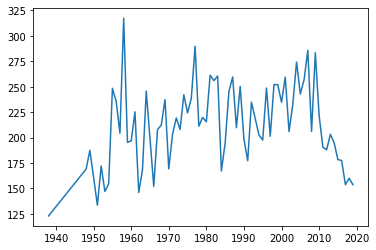

In [139]:
plot_year_values = []
for x,y in zip(keys,values):
    plot_year_values.append([x,y])
    
import seaborn as sns
def column(matrix, i):
    return [row[i] for row in matrix]

sns.lineplot(column(plot_year_values,0) , column(plot_year_values,1))


# import matplotlib.pyplot as plt 
# plt.bar(column(plot_year_values,0) , column(plot_year_values,1), label="Example" )
# # plt.bar([2,4,6,8,10],[8,6,2,5,6], label=”Example two”, color=’g’)
# plt.legend()
# plt.xlabel("bar")
# plt.ylabel("bar")
# plt.title("New graph")
# plt.show()

#### Fall of song lengths over the years

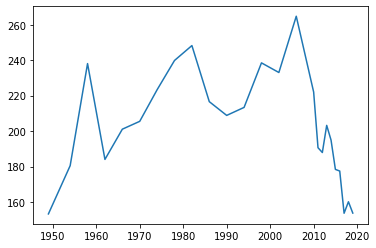

In [171]:
plot_year_values.sort()
plot_year_values

# take 4 years at a time and for year, take the middle year and plot

cycleYear = 4
plot_year_4_years = []
counter = 0
currentYear  = 0
cycleLength = 0
for x in plot_year_values:
    if(x[0] >= 2010):
        cycleYear = 1
        plot_year_4_years.append([x[0], x[1]])
        continue
    
    year = x[0]
    length = x[1]
    if(counter==(cycleYear/2)):
        currentYear = year  
    cycleLength+=length
    
    counter+=1
    if(counter%(cycleYear)==0):
        plot_year_4_years.append([currentYear, cycleLength/cycleYear])
        cycleLength = 0
        counter = 0
        
sns.lineplot(column(plot_year_4_years,0) , column(plot_year_4_years,1))

In [169]:
plot_year_4_years


[[1938, 123.0],
 [1948, 169.0],
 [1949, 187.5],
 [1951, 133.5],
 [1952, 172.0],
 [1953, 147.0],
 [1954, 154.5],
 [1955, 248.33333333333334],
 [1956, 235.5],
 [1957, 204.25],
 [1958, 317.1666666666667],
 [1959, 195.33333333333334],
 [1960, 196.66666666666666],
 [1961, 225.2],
 [1962, 146.0],
 [1963, 168.14285714285714],
 [1964, 245.66666666666666],
 [1965, 198.78571428571428],
 [1966, 152.0],
 [1967, 207.78571428571428],
 [1968, 212.15384615384616],
 [1969, 237.25],
 [1970, 169.22222222222223],
 [1971, 203.31034482758622],
 [1972, 219.23529411764707],
 [1973, 207.83333333333334],
 [1974, 242.0],
 [1975, 224.22222222222223],
 [1976, 238.74074074074073],
 [1977, 289.6666666666667],
 [1978, 211.14285714285714],
 [1979, 219.75],
 [1980, 215.45454545454547],
 [1981, 261.25],
 [1982, 255.8421052631579],
 [1983, 260.375],
 [1984, 167.2],
 [1985, 194.57142857142858],
 [1986, 245.07692307692307],
 [1987, 259.5],
 [1988, 209.66666666666666],
 [1989, 250.15384615384616],
 [1990, 198.33333333333334

In [173]:
yearly_compression_filtered[:1]

array([[[2019.        ,   62.38807506]]])

> yearly compression calculation

In [189]:
yearly_compressions = []
for x in yearly_compression_filtered:
    year = x[0][1]
    comp = x[0][0]
    yearly_compressions.append([year, comp])
    
    
yearly_compressions.sort()

1938.0 72.42524916943522
1948.0 61.09500596197457
1949.0 65.98088773130291
1951.0 64.74634778394311
1952.0 64.73468144024632
1953.0 67.2082247823846
1954.0 66.6550400305083
1955.0 70.8741181355971
1956.0 70.59270012333283
1957.0 66.31811623327282
1958.0 70.96770334595055
1959.0 64.24708542772447
1960.0 66.29719549995868
1961.0 69.04080320589158
1962.0 67.76729559748428
1963.0 67.35455143453889
1964.0 69.64206675847778
1965.0 64.98652768189777
1966.0 55.250802208085965
1967.0 66.80557470511987
1968.0 66.6240511937938
1969.0 68.68772715828214
1970.0 65.392846552996
1971.0 66.5852967282156
1972.0 66.96856439564704
1973.0 68.16934639690221
1974.0 71.86830404250709
1975.0 69.04993210120571
1976.0 68.51560915116569
1977.0 72.46470066792507
1978.0 69.63397722921968
1979.0 67.86457929692884
1980.0 68.39825581554693
1981.0 67.98032287371682
1982.0 68.6699558971688
1983.0 69.6752151490088
1984.0 61.18402773490558
1985.0 66.39445760069383
1986.0 70.80831417684837
1987.0 71.69129315959306
1988.0 6

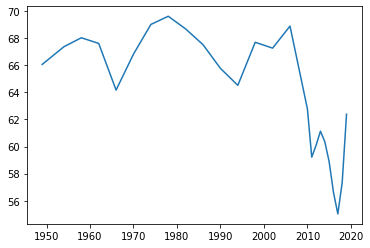

In [192]:
# take 4 years at a time and for year, take the middle year and plot

cycleYear = 4
plot_year_4_years = []
counter = 0
currentYear  = 0
cycleLength = 0
for x in yearly_compressions:
    if(x[0] ==0):
        continue
    if(x[0] >= 2010):
        cycleYear = 1
        plot_year_4_years.append([x[0], x[1]])
        continue
    
    
    year = x[0]
    length = x[1]
    
    print(year, length)
    if(counter==(cycleYear/2)):
        currentYear = year  
    cycleLength+=length
    
    counter+=1
    if(counter%(cycleYear)==0):
        plot_year_4_years.append([currentYear, cycleLength/cycleYear])
        cycleLength = 0
        counter = 0
        
sns.lineplot(column(plot_year_4_years,0) , column(plot_year_4_years,1))

In [191]:
yearly_compressions.sort()
yearly_compressions

[[1938.0, 72.42524916943522],
 [1948.0, 61.09500596197457],
 [1949.0, 65.98088773130291],
 [1951.0, 64.74634778394311],
 [1952.0, 64.73468144024632],
 [1953.0, 67.2082247823846],
 [1954.0, 66.6550400305083],
 [1955.0, 70.8741181355971],
 [1956.0, 70.59270012333283],
 [1957.0, 66.31811623327282],
 [1958.0, 70.96770334595055],
 [1959.0, 64.24708542772447],
 [1960.0, 66.29719549995868],
 [1961.0, 69.04080320589158],
 [1962.0, 67.76729559748428],
 [1963.0, 67.35455143453889],
 [1964.0, 69.64206675847778],
 [1965.0, 64.98652768189777],
 [1966.0, 55.250802208085965],
 [1967.0, 66.80557470511987],
 [1968.0, 66.6240511937938],
 [1969.0, 68.68772715828214],
 [1970.0, 65.392846552996],
 [1971.0, 66.5852967282156],
 [1972.0, 66.96856439564704],
 [1973.0, 68.16934639690221],
 [1974.0, 71.86830404250709],
 [1975.0, 69.04993210120571],
 [1976.0, 68.51560915116569],
 [1977.0, 72.46470066792507],
 [1978.0, 69.63397722921968],
 [1979.0, 67.86457929692884],
 [1980.0, 68.39825581554693],
 [1981.0, 67.980

In [143]:
# count= 0
# for x,y in (zip(myYears, myLyrics)):
#     print(x)
#     print()
#     print(y)
#     if(count == 5):
#         break

In [142]:
data2 = pd.read_csv("data2_old_songs.csv")
